## Matplotlib - Plotting Pie Charts

In [1]:
# import libraries - this time added ast lib, to cleanup the skills where it was previously as a str and not a list
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanup data
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) 
    if pd.notna(skill_list) 
    else skill_list)

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

### Exercise 1 : Plotting a Pie Chart for ```Work From Home``` status

- In this chart we will only plot 2 things because its a boolean value, really great for pie charts

- refer to  [Python Documentation ](https://docs.python.org/3/library/string.html) for Format Specification Mini-Language

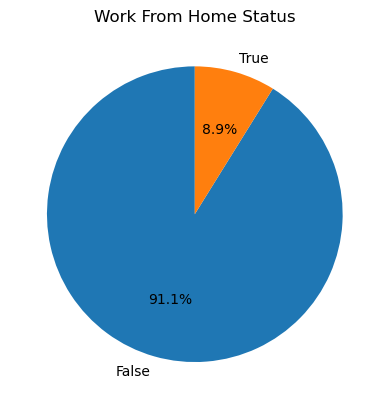

In [16]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%') # start angle is to orient 
plt.ylabel("")
plt.title("Work From Home Status")
plt.show()

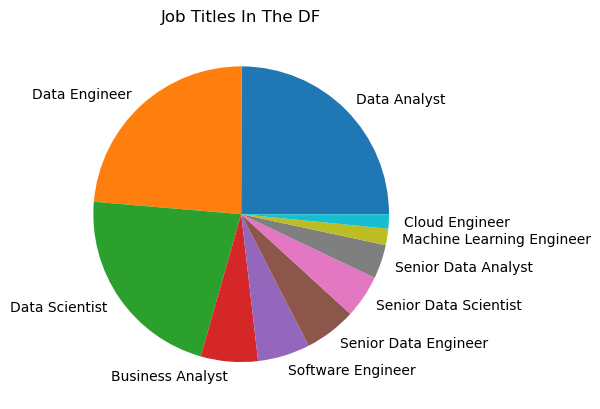

In [11]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.ylabel("")
plt.title("Job Titles In The DF")
plt.show()

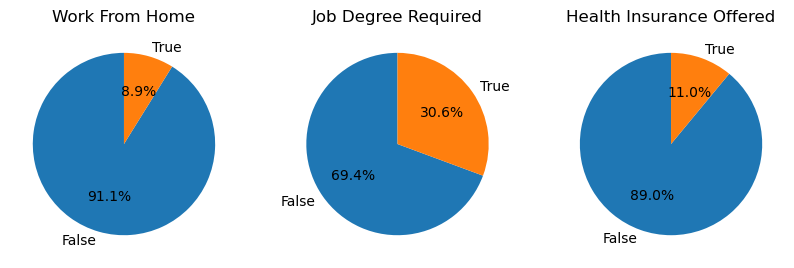

In [47]:
fig, ax = plt.subplots(1,3,figsize=(10,6))

dict_col = {
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention' : 'Job Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
}

for index,(column,title) in enumerate(dict_col.items()):
    # print(index, column, title)
    ax[index].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[index].set_title(title)
    # ax[index].get_figure().set_size_inches(10, 6) # set the size of the figure
    
plt.show()